In [1]:
from greedy_mcmc_attack import *

In [2]:
device = "cuda" if torch.cuda.is_available() else "cpu"

In [3]:
# dataset_directory = "../Cora"
cora_dataset = Planetoid(root='', name='Cora')
data = cora_dataset[0].to(device)
print(data)

Data(x=[2708, 1433], edge_index=[2, 10556], y=[2708], train_mask=[2708], val_mask=[2708], test_mask=[2708])


In [4]:
# model = GCN(data.x.shape[1], cora_dataset.num_classes, [16]).to(device)

In [5]:
# model.reset_parameters()
# train = Trainable(model)
# train.fit(data, 200)

In [6]:
# # Get initial accuracy
# initial_loss, initial_accuracy = train.test(data)
# print(f"Initial Accuracy: {initial_accuracy}")
# print(f"Initial Loss: {initial_loss}")

In [7]:
edges_to_add = None

In [8]:
model_save_path = "multi_metattack_gcn_model.pth"
list_save_path = "multi_metattack_edges_list.pth"

In [9]:
# # save model
# torch.save(model.state_dict(), model_save_path)

# # save edges
# torch.save(edges_to_add, list_save_path)

In [10]:
model, edges_to_add, train = load_model_and_edges(model_save_path, list_save_path, data.x.shape[1], cora_dataset.num_classes, [16], device)

In [11]:
# Get initial accuracy
initial_loss, initial_accuracy = train.test(data)
print(f"Initial Accuracy: {initial_accuracy}")
print(f"Initial Loss: {initial_loss}")

Initial Accuracy: 0.749
Initial Loss: 1.8118197917938232


In [12]:
G, initial_edge_count, ptb_rate, budget = initialize(data, _ptb_rate=0.15)

In [16]:
splits = [0.0, 0.5, 0.7, 0.9]
split_dic_acc = defaultdict(list)
split_dic_loss = defaultdict(list)
itrs_one = defaultdict(int)

In [17]:
for s in splits:
    print(s)
    split_dic_acc[s], split_dic_loss[s], itrs_one[s] = two_phase_attack_mcmc(data, train, model, s, edges_to_add, binary_fn, constant_fn, device, verbose=True)

0.0


Peturbing graph...:   0%|          | 0/395 [00:00<?, ?it/s]

Peturbing graph...:   0%|          | 0/395 [00:00<?, ?it/s]

0.5


Peturbing graph...:   0%|          | 0/197 [00:00<?, ?it/s]

Attempt: 0, Selected: 0
max_change: 0.01811819791793823, master_clean_delta: 1.1920928955078125e-07, master_dirty_delta: 0.0004687309265136719
Attempt: 15, Selected: 10
max_change: 0.01811819791793823, master_clean_delta: -0.00030243396759033203, master_dirty_delta: 0.0012085437774658203
Attempt: 16, Selected: 10
max_change: 0.01811819791793823, master_clean_delta: 0.001125335693359375, master_dirty_delta: 0.00209653377532959
Attempt: 27, Selected: 20
max_change: 0.01811819791793823, master_clean_delta: 0.010615706443786621, master_dirty_delta: 0.013404369354248047
Attempt: 41, Selected: 30
max_change: 0.01811819791793823, master_clean_delta: 0.01339113712310791, master_dirty_delta: 0.015205979347229004
Attempt: 42, Selected: 30
max_change: 0.01811819791793823, master_clean_delta: 0.013561606407165527, master_dirty_delta: 0.015624046325683594
Attempt: 43, Selected: 30
max_change: 0.01811819791793823, master_clean_delta: 0.013706564903259277, master_dirty_delta: 0.015072464942932129
Att

Peturbing graph...:   0%|          | 0/204 [00:00<?, ?it/s]

0.7


Peturbing graph...:   0%|          | 0/118 [00:00<?, ?it/s]

Attempt: 0, Selected: 0
max_change: 0.01811819672584534, master_clean_delta: 2.384185791015625e-07, master_dirty_delta: -5.984306335449219e-05
Attempt: 1, Selected: 0
max_change: 0.01811819672584534, master_clean_delta: -0.001565098762512207, master_dirty_delta: -0.0016111135482788086
Attempt: 2, Selected: 0
max_change: 0.01811819672584534, master_clean_delta: 2.384185791015625e-07, master_dirty_delta: -0.00015604496002197266
Attempt: 3, Selected: 0
max_change: 0.01811819672584534, master_clean_delta: -0.0010581016540527344, master_dirty_delta: -0.001058340072631836
Attempt: 4, Selected: 0
max_change: 0.01811819672584534, master_clean_delta: -2.47955322265625e-05, master_dirty_delta: -0.0004431009292602539
Attempt: 5, Selected: 0
max_change: 0.01811819672584534, master_clean_delta: 2.384185791015625e-07, master_dirty_delta: 2.205371856689453e-05
Attempt: 22, Selected: 10
max_change: 0.01811819672584534, master_clean_delta: 0.002001643180847168, master_dirty_delta: 0.0026863813400268555

Peturbing graph...:   0%|          | 0/124 [00:00<?, ?it/s]

0.9


Peturbing graph...:   0%|          | 0/39 [00:00<?, ?it/s]

Attempt: 0, Selected: 0
max_change: 0.01811819791793823, master_clean_delta: 0.0, master_dirty_delta: -1.1920928955078125e-07
Attempt: 1, Selected: 0
max_change: 0.01811819791793823, master_clean_delta: -0.0015652179718017578, master_dirty_delta: -0.0023148059844970703
Attempt: 2, Selected: 0
max_change: 0.01811819791793823, master_clean_delta: 1.1920928955078125e-07, master_dirty_delta: 0.0
Attempt: 3, Selected: 0
max_change: 0.01811819791793823, master_clean_delta: -0.001058340072631836, master_dirty_delta: -0.0010584592819213867
Attempt: 4, Selected: 0
max_change: 0.01811819791793823, master_clean_delta: -2.47955322265625e-05, master_dirty_delta: -2.491474151611328e-05
Attempt: 5, Selected: 0
max_change: 0.01811819791793823, master_clean_delta: 0.0, master_dirty_delta: 1.1920928955078125e-07
Attempt: 26, Selected: 10
max_change: 0.01811819791793823, master_clean_delta: 0.003163933753967285, master_dirty_delta: 0.002919912338256836
Attempt: 62, Selected: 20
max_change: 0.018118197917

Peturbing graph...:   0%|          | 0/42 [00:00<?, ?it/s]

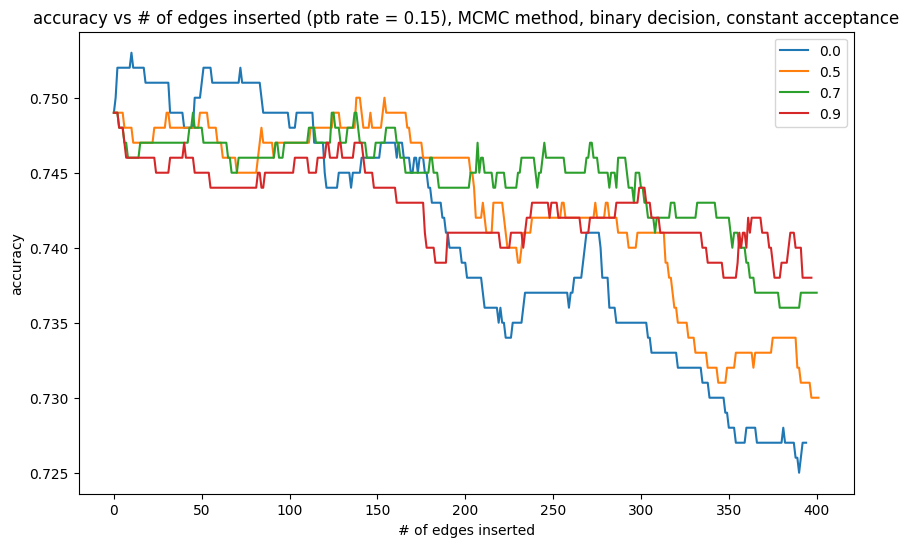

In [18]:
plot_results(split_dic_acc, ptb_rate, "MCMC", "binary", "constant", "accuracy")

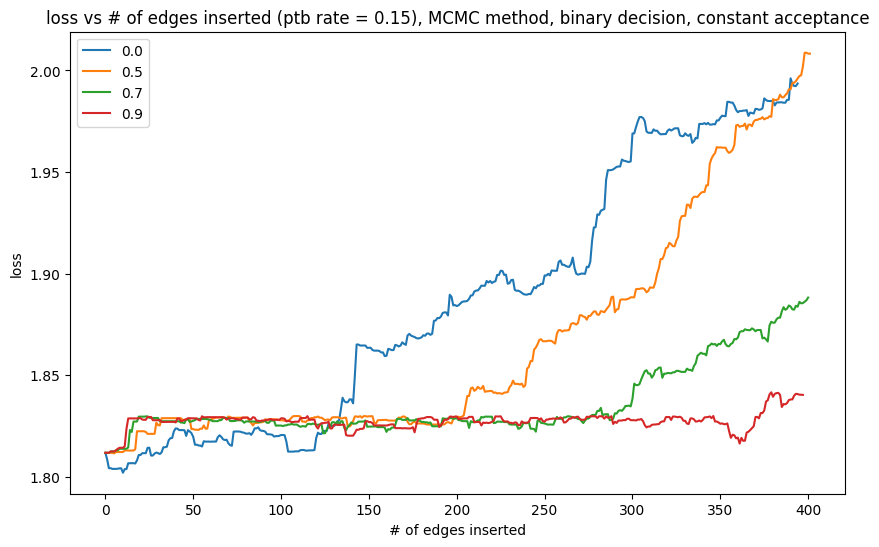

In [19]:
plot_results(split_dic_loss, ptb_rate, "MCMC", "binary", "constant", "loss")

##### ideally, we could show some metric, where (change in loss after hidden for %) > (% * max change in loss)

In [20]:
split_dic_decreasing_acc = defaultdict(list)
itrs_two = defaultdict(int)
split_dic_decreasing_loss = defaultdict(list)

In [21]:
for s in splits:
    split_dic_decreasing_acc[s], split_dic_decreasing_loss[s], itrs_two[s] = two_phase_attack_mcmc(data, train, model, s, edges_to_add, binary_fn, increasing_fn, device, verbose=True)

Peturbing graph...:   0%|          | 0/395 [00:00<?, ?it/s]

Peturbing graph...:   0%|          | 0/395 [00:00<?, ?it/s]

Peturbing graph...:   0%|          | 0/197 [00:00<?, ?it/s]

Attempt: 0, Selected: 0
max_change: 0.01811819791793823, master_clean_delta: 1.1920928955078125e-07, master_dirty_delta: 0.00046896934509277344
Attempt: 17, Selected: 10
max_change: 0.01811819791793823, master_clean_delta: 0.00040209293365478516, master_dirty_delta: 0.0028328895568847656
Attempt: 31, Selected: 20
max_change: 0.01811819791793823, master_clean_delta: -0.0002771615982055664, master_dirty_delta: 0.0034341812133789062
Attempt: 47, Selected: 30
max_change: 0.01811819791793823, master_clean_delta: 0.002877950668334961, master_dirty_delta: 0.006150364875793457
Attempt: 48, Selected: 30
max_change: 0.01811819791793823, master_clean_delta: 0.004846692085266113, master_dirty_delta: 0.007750034332275391
Attempt: 49, Selected: 30
max_change: 0.01811819791793823, master_clean_delta: 0.003299117088317871, master_dirty_delta: 0.00807178020477295
Attempt: 50, Selected: 30
max_change: 0.01811819791793823, master_clean_delta: 0.0019335746765136719, master_dirty_delta: 0.00787377357482910

Peturbing graph...:   0%|          | 0/204 [00:00<?, ?it/s]

Peturbing graph...:   0%|          | 0/118 [00:00<?, ?it/s]

Attempt: 0, Selected: 0
max_change: 0.01811819791793823, master_clean_delta: 1.1920928955078125e-07, master_dirty_delta: -5.984306335449219e-05
Attempt: 1, Selected: 0
max_change: 0.01811819791793823, master_clean_delta: -0.0015652179718017578, master_dirty_delta: -0.0016111135482788086
Attempt: 2, Selected: 0
max_change: 0.01811819791793823, master_clean_delta: 0.0, master_dirty_delta: -0.00015604496002197266
Attempt: 3, Selected: 0
max_change: 0.01811819791793823, master_clean_delta: -0.0010582208633422852, master_dirty_delta: -0.001058340072631836
Attempt: 4, Selected: 0
max_change: 0.01811819791793823, master_clean_delta: -2.47955322265625e-05, master_dirty_delta: -0.0004431009292602539
Attempt: 5, Selected: 0
max_change: 0.01811819791793823, master_clean_delta: 1.1920928955078125e-07, master_dirty_delta: 2.193450927734375e-05
Attempt: 24, Selected: 10
max_change: 0.01811819791793823, master_clean_delta: 0.0006755590438842773, master_dirty_delta: 0.004034161567687988
Attempt: 39, S

Peturbing graph...:   0%|          | 0/124 [00:00<?, ?it/s]

Peturbing graph...:   0%|          | 0/39 [00:00<?, ?it/s]

Attempt: 0, Selected: 0
max_change: 0.01811819672584534, master_clean_delta: 1.1920928955078125e-07, master_dirty_delta: 1.1920928955078125e-07
Attempt: 36, Selected: 10
max_change: 0.01811819672584534, master_clean_delta: -0.0010638236999511719, master_dirty_delta: -0.0009388923645019531
Attempt: 37, Selected: 10
max_change: 0.01811819672584534, master_clean_delta: 4.5418739318847656e-05, master_dirty_delta: 0.00017058849334716797
Attempt: 38, Selected: 10
max_change: 0.01811819672584534, master_clean_delta: -0.0009946823120117188, master_dirty_delta: -0.0008696317672729492
Attempt: 39, Selected: 10
max_change: 0.01811819672584534, master_clean_delta: -6.198883056640625e-06, master_dirty_delta: -0.0003962516784667969
Attempt: 40, Selected: 10
max_change: 0.01811819672584534, master_clean_delta: 4.5418739318847656e-05, master_dirty_delta: 0.0001704692840576172
Attempt: 62, Selected: 20
max_change: 0.01811819672584534, master_clean_delta: -0.0005129575729370117, master_dirty_delta: 0.00

Peturbing graph...:   0%|          | 0/42 [00:00<?, ?it/s]

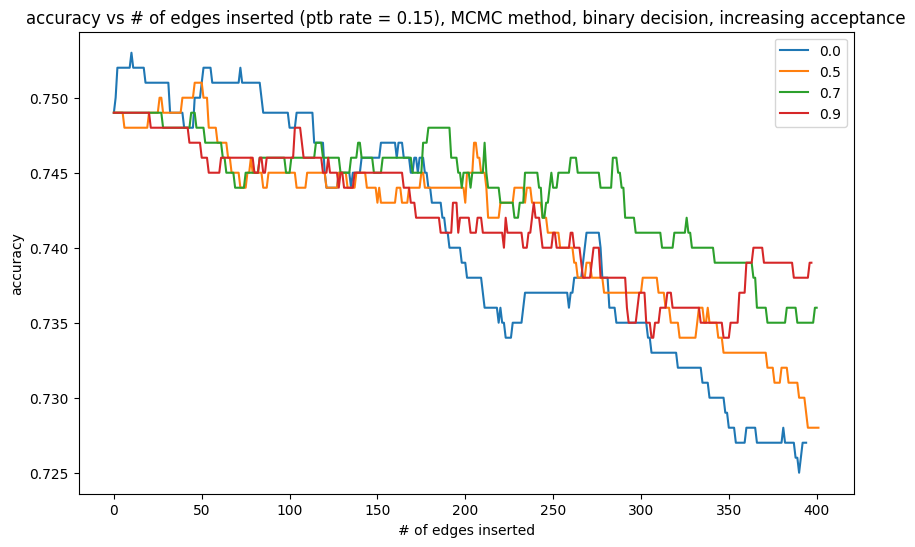

In [22]:
plot_results(split_dic_decreasing_acc, ptb_rate, "MCMC", "binary", "increasing", "accuracy")

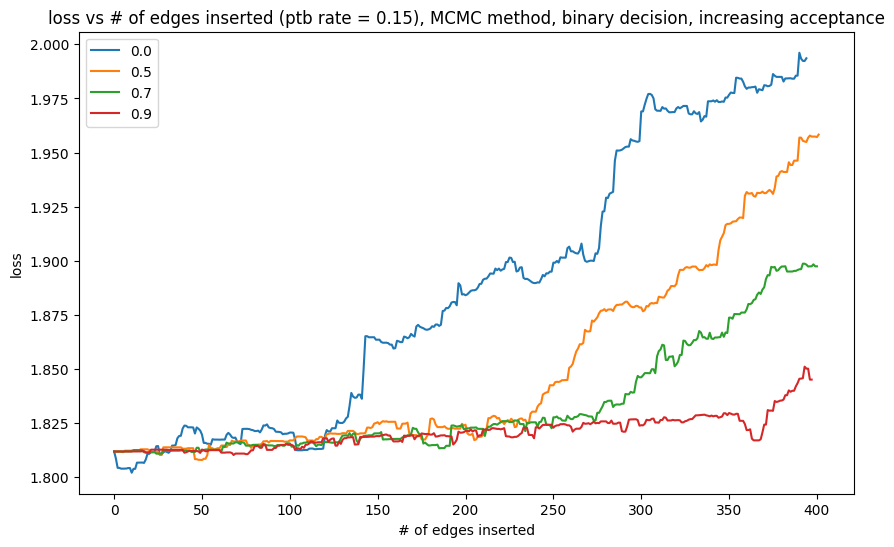

In [23]:
plot_results(split_dic_decreasing_loss, ptb_rate, "MCMC", "binary", "increasing", "loss")

In [24]:
split_dic_decreasing_constant_acc = defaultdict(list)
split_dic_decreasing_constant_loss = defaultdict(list)
itrs_three = defaultdict(int)

In [25]:
for s in splits:
    split_dic_decreasing_constant_acc[s], split_dic_decreasing_constant_loss[s], itrs_three[s] = two_phase_attack_mcmc(data, train, model, s, edges_to_add, decreasing_fn, constant_fn, device, verbose=True)

Peturbing graph...:   0%|          | 0/395 [00:00<?, ?it/s]

KeyboardInterrupt: 

In [ ]:
plot_results(split_dic_decreasing_constant_acc, ptb_rate, "MCMC", "decreasing", "constant", "accuracy")

In [ ]:
plot_results(split_dic_decreasing_constant_loss, ptb_rate, "MCMC", "decreasing", "constant", "loss")

In [ ]:
split_dic_decreasing_gradual_acc = defaultdict(list)
split_dic_decreasing_gradual_loss = defaultdict(list)
itrs_four = defaultdict(int)

In [ ]:
for s in splits:
    split_dic_decreasing_gradual_acc[s], split_dic_decreasing_gradual_loss[s], itrs_four[s] = two_phase_attack_mcmc(data, train, model, s, edges_to_add, decreasing_fn, increasing_fn, device, verbose=True)

In [ ]:
plot_results(split_dic_decreasing_gradual_acc, ptb_rate, "MCMC", "decreasing", "increasing", "accuracy")

In [ ]:
plot_results(split_dic_decreasing_gradual_loss, ptb_rate, "MCMC", "decreasing", "increasing", "accuracy")